In [1]:
%matplotlib inline
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
#from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint


Using TensorFlow backend.


In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="0"

glob --> https://wikidocs.net/83
mpimg.imread  -->  http://m.blog.daum.net/geoscience/1263?categoryId=8
enumerate --> https://wayhome25.github.io/python/2017/02/24/py-07-for-loop/

# circles

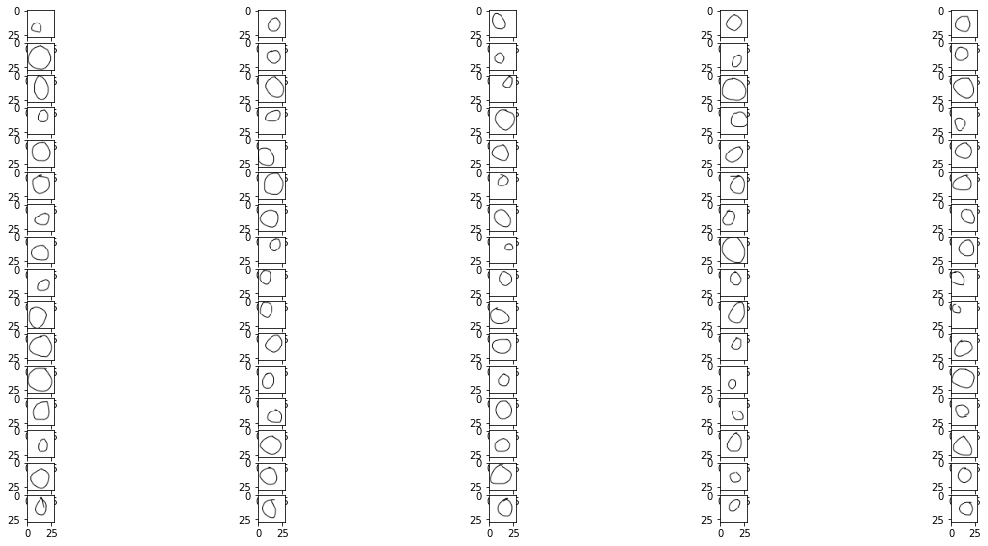

In [3]:
images = []  
for img_path in glob.glob('data/shapes/circles/*.png'):
    images.append(mpimg.imread(img_path)) 
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

# Squares

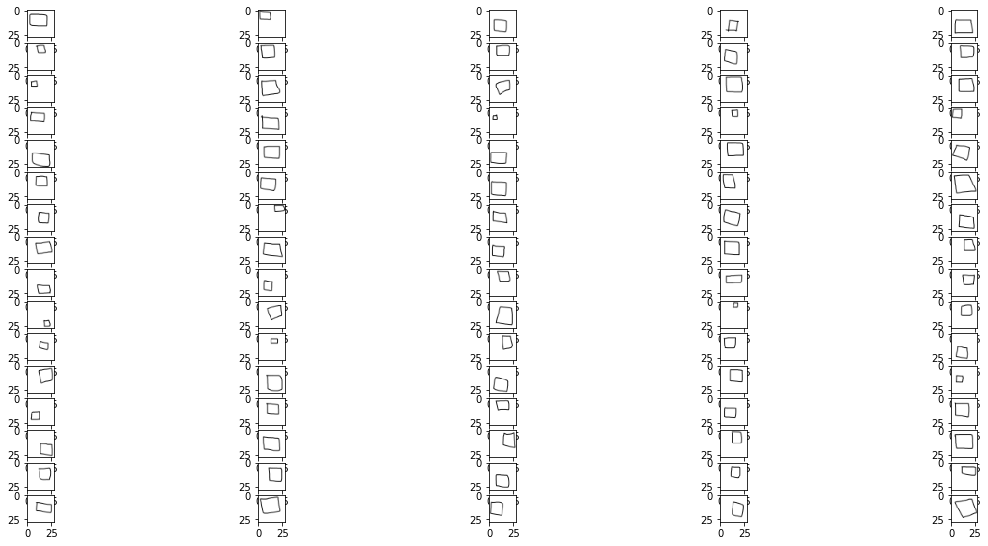

In [4]:
images = []
for img_path in glob.glob('data/shapes/squares/*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

# Triangles

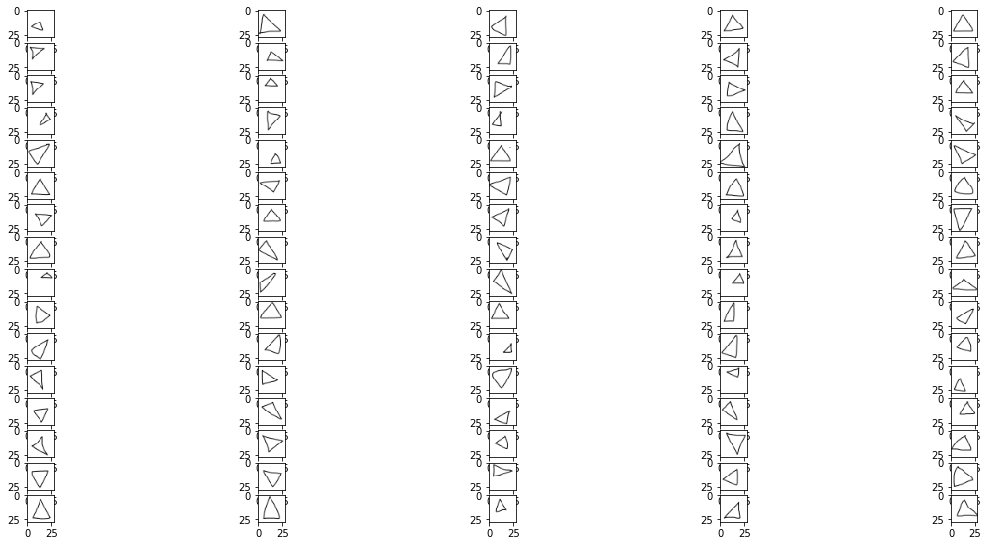

In [5]:
images = []
for img_path in glob.glob('data/shapes/triangles/*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

# Stars

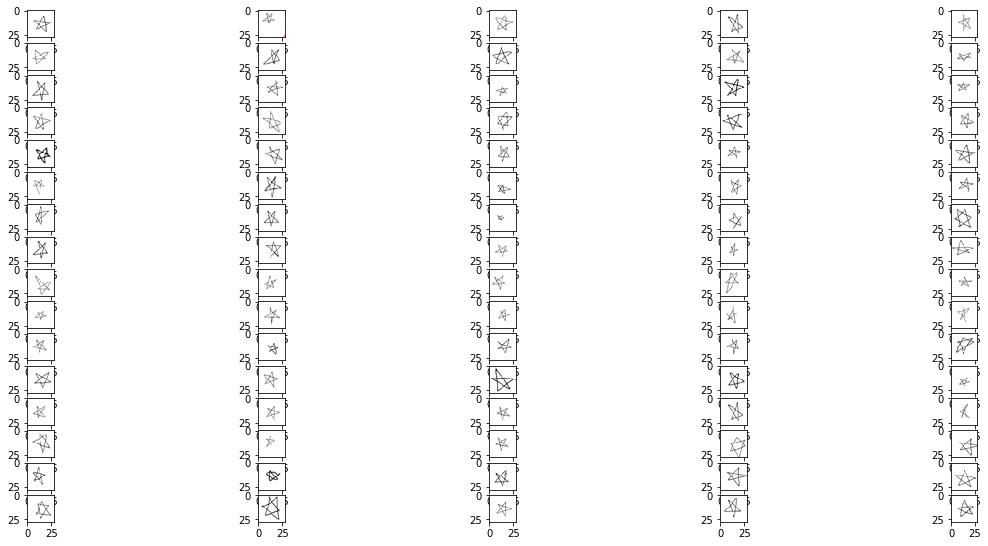

In [6]:
images = []
for img_path in glob.glob('data/shapes/stars/*.PNG'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [7]:
img = im.imread('data/shapes/squares/drawing(40).png')
img.shape

(28, 28, 3)

In [8]:
img = im.imread('data/shapes/stars/5.PNG')
img.shape

(28, 28, 4)

In [9]:
# Initialising the CNN
classifier = Sequential()

W0710 15:40:36.104814 140012703901504 deprecation_wrapper.py:119] From /home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [10]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), padding='same', input_shape = (28, 28, 3), activation = 'relu'))

classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25
# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25
# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25
# Step 3 - Flattening
classifier.add(Flatten())   
# Step 4 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))  
classifier.add(Dropout(0.5)) 
classifier.add(Dense(units = 4, activation = 'softmax'))

W0710 15:40:36.126555 140012703901504 deprecation_wrapper.py:119] From /home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 15:40:36.128228 140012703901504 deprecation_wrapper.py:119] From /home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0710 15:40:36.144268 140012703901504 deprecation_wrapper.py:119] From /home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0710 15:40:36.145447 140012703901504 deprecation_wrapper.py:119] From /home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_wit

In [11]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
__________

In [12]:
(3*3*3)*32+32

896

In [13]:
3*3*32*32+32

9248

In [14]:
3*3*32*64+64

18496

In [15]:
3*3*64*64+64

36928

In [16]:
64*512+512

33280

In [17]:
512*4+4

2052

In [18]:
896+9248+18496+36928+36928+36928+33280+2052

174756

In [19]:
# Compiling the CNN  
classifier.compile(optimizer = 'rmsprop',   
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy']) # 무슨 단위를 보고 학습할거냐

W0710 15:40:36.329481 140012703901504 deprecation_wrapper.py:119] From /home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0710 15:40:36.367297 140012703901504 deprecation_wrapper.py:119] From /home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('data/shapes',
                                                 target_size = (28,
                                                 28),
                                                 batch_size = 16,  #2의 배수 단위로 설정함. 한번에 학습시키는 데이터 수 클수록 무조건 좋음
                                                 class_mode =
                                                     'categorical')


Found 320 images belonging to 4 classes.


In [21]:
test_set = test_datagen.flow_from_directory('data/shapes_test',
                                            target_size = (28, 28),
                                            batch_size = 16,
                                            class_mode =
                                                 'categorical')

Found 80 images belonging to 4 classes.


In [22]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

# Training the model

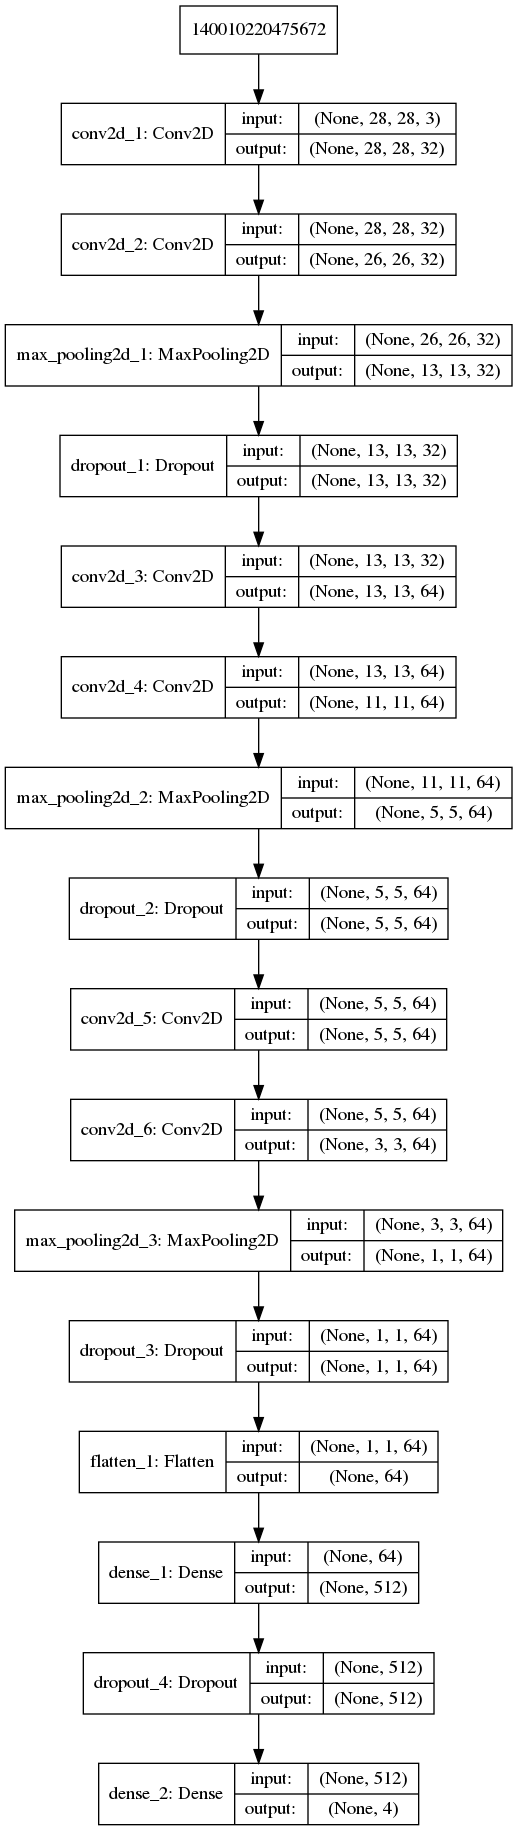

In [23]:
from keras.utils import plot_model

plot_model(classifier, to_file='./model.png', show_shapes=True)
plot_model(classifier, to_file='./model.svg', show_shapes=True)
from IPython.display import Image
Image('./model.png')

In [24]:
history = classifier.fit_generator(training_set,
                                   steps_per_epoch = 100,
                                   epochs = 20,
                                   callbacks=[checkpointer],
                                   validation_data = test_set,
                                   validation_steps = 50)

W0710 15:40:36.789474 140012703901504 deprecation.py:323] From /home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
100/100 [==============================] - 2s 18ms/step - loss: 1.3954 - acc: 0.2175 - val_loss: 1.3859 - val_acc: 0.3000

Epoch 00001: val_acc improved from -inf to 0.30000, saving model to best_weights.hdf5
Epoch 2/20
100/100 [==============================] - 0s 5ms/step - loss: 1.2102 - acc: 0.4344 - val_loss: 0.8988 - val_acc: 0.7500

Epoch 00002: val_acc improved from 0.30000 to 0.75000, saving model to best_weights.hdf5
Epoch 3/20
100/100 [==============================] - 0s 5ms/step - loss: 0.8858 - acc: 0.6975 - val_loss: 0.8305 - val_acc: 0.7125

Epoch 00003: val_acc did not improve from 0.75000
Epoch 4/20
100/100 [==============================] - 0s 5ms/step - loss: 0.6359 - acc: 0.7837 - val_loss: 0.5605 - val_acc: 0.7875

Epoch 00004: val_acc improved from 0.75000 to 0.78750, saving model to best_weights.hdf5
Epoch 5/20
100/100 [==============================] - 0s 5ms/step - loss: 0.4642 - acc: 0.8406 - val_loss: 0.4480 - val_acc: 0.8250

Epoch 00005: val_acc

In [25]:
classifier.load_weights('best_weights.hdf5')

# Displaying curves of loss and accuracy during training

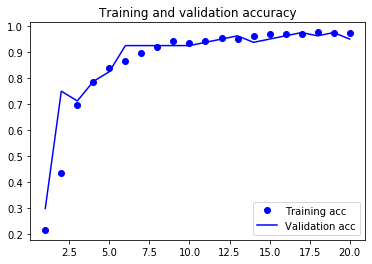

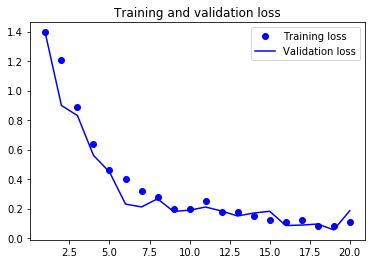

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
!ls data/shapes_test/triangles

'drawing(100).png'  'drawing(85).png'  'drawing(90).png'  'drawing(95).png'
'drawing(81).png'   'drawing(86).png'  'drawing(91).png'  'drawing(96).png'
'drawing(82).png'   'drawing(87).png'  'drawing(92).png'  'drawing(97).png'
'drawing(83).png'   'drawing(88).png'  'drawing(93).png'  'drawing(98).png'
'drawing(84).png'   'drawing(89).png'  'drawing(94).png'  'drawing(99).png'


# Predicting the class of unseen images

In [28]:
from keras.preprocessing import image

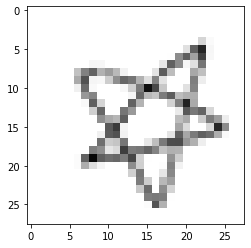

(1, 28, 28, 3)


In [29]:
img_path = 'data/shapes_test/stars/92.PNG'
img = image.load_img(img_path, target_size=(28, 28))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [30]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = classifier.predict_classes(images, batch_size=10)
print("Predicted class is:",classes)

Predicted class is: [2]


# Visualizing intermediate activations

## Instantiating a model from an input tensor and a list of output tensors

In [31]:
layer_outputs = [layer.output for layer in classifier.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=classifier.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

## Running the model in predict mode

In [32]:
activations = activation_model.predict(img_tensor) 
# Returns a list of five Numpy arrays: one array per layer activation

In [33]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 28, 28, 32)


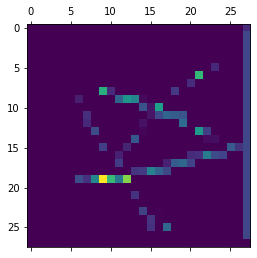

In [34]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

# Visualizing every channel in every intermediate activation

/home/hyejoo/.venv/py36tf/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


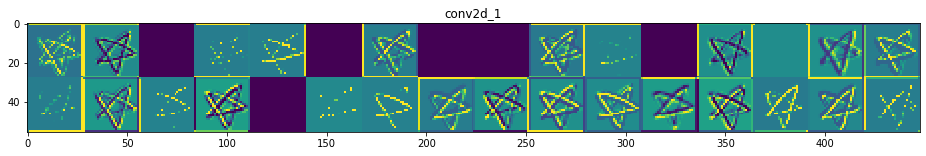

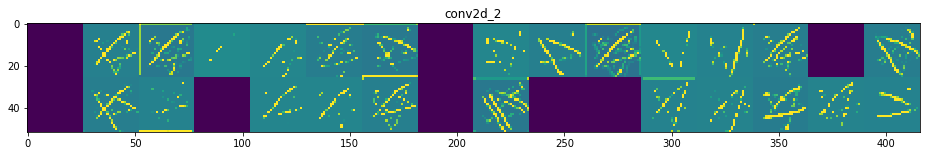

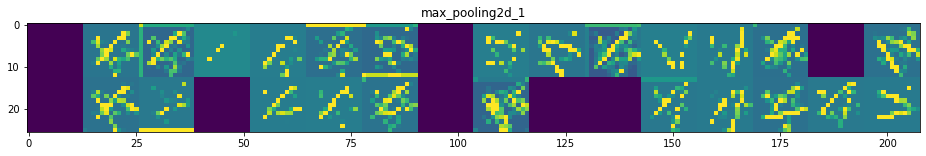

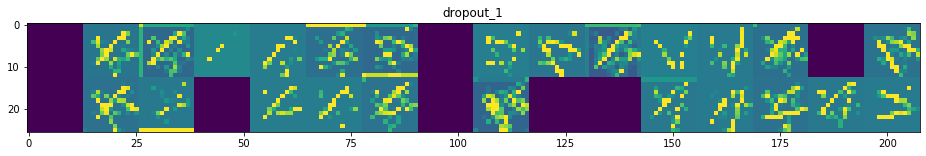

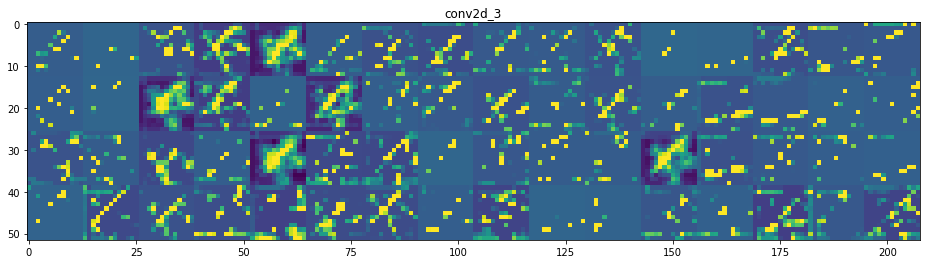

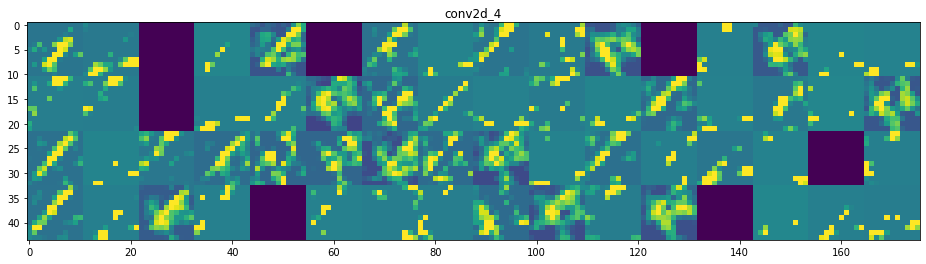

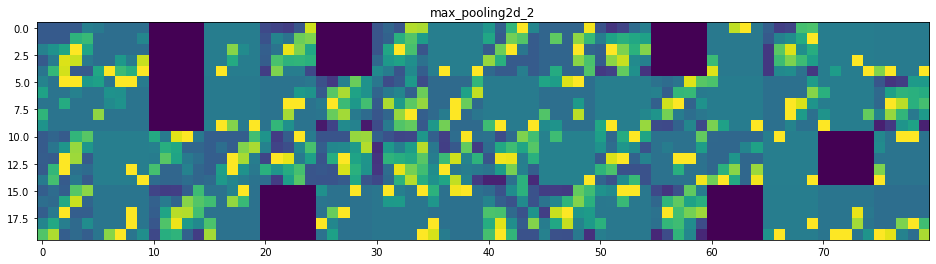

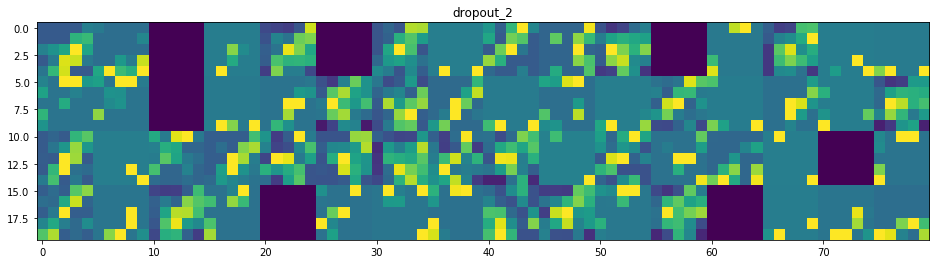

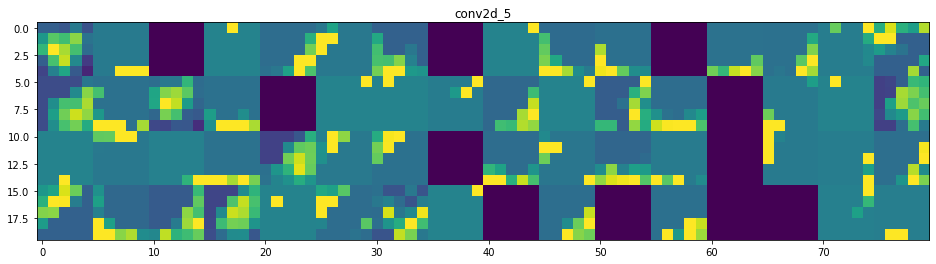

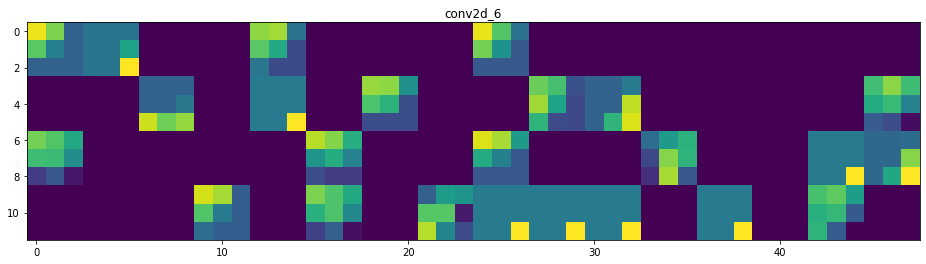

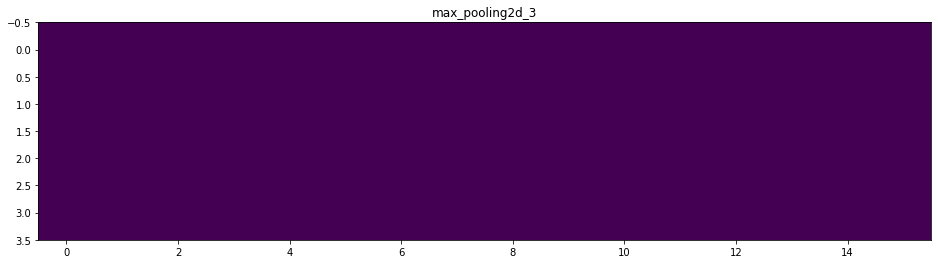

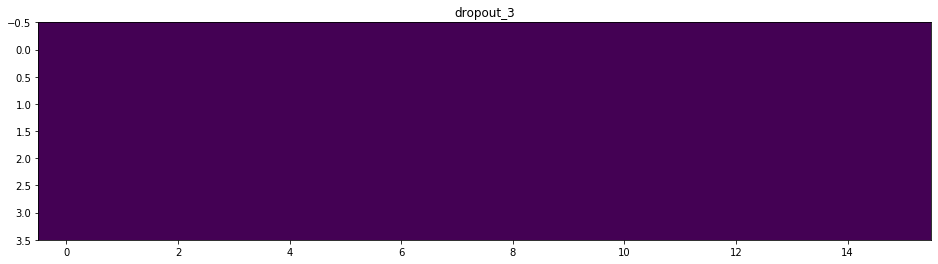

In [35]:
layer_names = []
for layer in classifier.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')